In [ ]:
# Inference for two population means
# independent samples
# population standar deviations assumed to be equal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

In [34]:
# Ho: salaries do not differ
# Ha: salaries differ

# Hypotheses:
# H0: μ1 = μ2 (the means are equal)
# H1: μ1 ≠ μ2 (the means are not equal, two-tailed test)

# define the threshold
alpha = 0.05

# Define the two datasets as arrays
sample_1_private_institutions = [
    97.3, 85.9, 118.8, 93.9, 66.6, 109.2, 64.9,
    83.1, 100.6, 99.3, 94.9, 94.4, 139.3, 108.8,
    158.1, 142.4, 85.0, 108.2, 116.3, 141.5, 51.4,
    125.6, 70.6, 74.6, 69.9, 115.4, 84.6, 92.0,
    97.2, 55.1, 126.6, 116.7, 76.0, 109.6, 63.0
]

sample_2_public_institutions = [
    59.9, 115.7, 126.1, 50.3, 133.1, 89.3,
    82.5, 67.1, 60.7, 79.9, 50.1, 81.7,
    83.9, 102.5, 109.9, 105.1, 67.9, 107.5,
    54.9, 41.5, 59.5, 65.9, 76.9, 66.9,
    85.9, 113.9, 70.3, 90.1, 99.7, 96.7
]

# Convert the datasets into numpy arrays for easier calculations
sample_1 = np.array(sample_1_private_institutions)
sample_2 = np.array(sample_2_public_institutions)

# sample sizes
n1 = len(sample_1)
n2 = len(sample_2)

# sample means
mean_1 = np.mean(sample_1)
mean_2 = np.mean(sample_2)

<class 'int'>


test for normality: ShapiroResult(statistic=0.9818521738052368, pvalue=0.8176652193069458)
do not reject the null


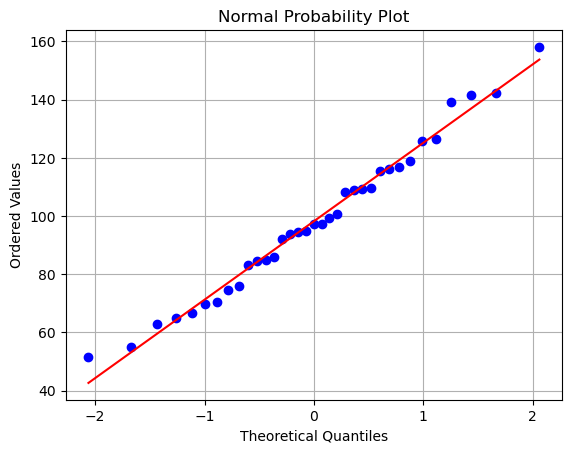

In [10]:
## test for normality on sample 1

# test for normality
# Ho: data is normally distributued
# Ha: data is not normally distributed

shapiro_test = stats.shapiro(sample_1_private_institutions)
print(f'test for normality: {shapiro_test}')

if (round(shapiro_test[1],2)) < alpha:
    print("reject the null hypotheses")
else:
    print("do not reject the null")

fix, ax = plt.subplots()
stats.probplot(sample_1_private_institutions, dist="norm", plot=ax)
plt.title("Normal Probability Plot")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

test for normality: ShapiroResult(statistic=0.9749006032943726, pvalue=0.6798006296157837)
do not reject the null


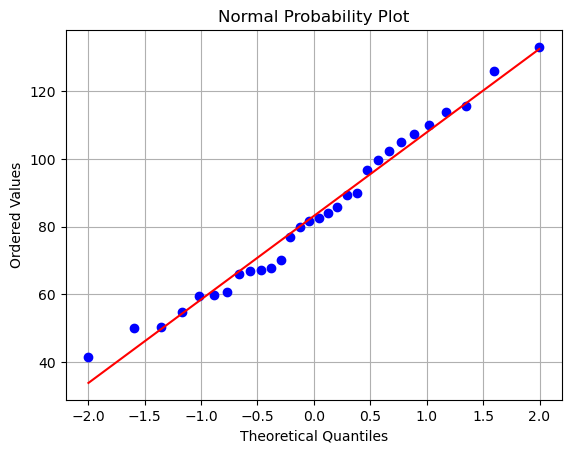

In [11]:
## test for normality on sample 1

# test for normality
# Ho: data is normally distributued
# Ha: data is not normally distributed

shapiro_test = stats.shapiro(sample_2_public_institutions)
print(f'test for normality: {shapiro_test}')

if (round(shapiro_test[1],2)) < alpha:
    print("reject the null hypotheses")
else:
    print("do not reject the null")

fix, ax = plt.subplots()
stats.probplot(sample_2_public_institutions, dist="norm", plot=ax)
plt.title("Normal Probability Plot")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

In [44]:
# sample standard deviations
std_1 = np.std(sample_1, ddof=1)
std_2 = np.std(sample_2, ddof=1)

# Critical-Value Approach
print("critical value approach")

# Calculate the pooled sample standard deviation
pooled_std = np.sqrt(((n1 - 1)*(std_1**2) + (n2-1)*(std_2**2)) / (n1 + n2 -1))
pooled_std = round(pooled_std,3)
print(f'Sp: {pooled_std}')

# Calculate the test statistic (t-test for independent samples)
t_statistic = (mean_1 - mean_2) / ((pooled_std)*(np.sqrt((1/n1) + (1/n2))))
t_statistic = round(t_statistic,2)
print(f't-statistic: {t_statistic}')

# Degrees of freedom for t-distribution
df = n1 + n2 - 2

# Determine critical t-value for 95% confidence level (two-tailed test)
t_critical = stats.t.ppf(1 - alpha/2, df)
t_critical = round(t_critical,3)
print(f'critical value: {t_critical}')

# P-Value Approach
print("\np-value approach")
# Perform the t-test for two independent samples
t_statistic_p, p_value = stats.ttest_ind(sample_1, sample_2)
p_value = round(p_value,2)
print(f'alpha: {alpha}')
print(f'p-value: {p_value}')

critical value approach
Sp: 24.997
t-statistic: 2.41
critical value: 1.998

p-value approach
alpha: 0.05
p-value: 0.02


In [50]:
## confidence intervals
# find a confidence level that corresponds with 1 - alpha (already did this above)

# Determine critical t-value for 95% confidence level (two-tailed test)
t_critical = stats.t.ppf(1 - alpha/2, df)
t_critical = round(t_critical,3)
print(f'critical value: {t_critical}')

# differnece of sample means
mean_diff = mean_1 - mean_2
mean_diff = round(mean_diff,2)
# print(f'x_bar_1 - x_bar_2: {mean_diff}')

# calclate margin of error
margin_of_error = t_critical * ((pooled_std)*(np.sqrt((1/n1) + (1/n2))))
margin_of_error = round(margin_of_error,2)
print(f'ME: {margin_of_error}')

# Confidence interval for the difference of the means
confidence_interval_lower = (mean_1 - mean_2) - margin_of_error
confidence_interval_lower = round(confidence_interval_lower,2)
confidence_interval_upper = (mean_1 - mean_2) + margin_of_error
confidence_interval_upper = round(confidence_interval_upper,2)
print(f'confidence interval: {mean_diff} +- {margin_of_error}')
print(f'upperbound: {mean_diff + margin_of_error}')
print(f'lowerbound: {mean_diff - margin_of_error}')

critical value: 1.998
ME: 12.43
confidence interval: 15.01 +- 12.43
upperbound: 27.439999999999998
lowerbound: 2.58
